In [180]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the Data

In [182]:
# Load the dataset
# Adjust encoding if necessary, depending on the data's format
data = pd.read_csv('Copy of Sentiment.csv', encoding='ISO-8859-1')  # Use 'latin-1', 'ISO-8859-1' or encoding='cp1252'

# Data Preprocessing

In [184]:
# Data Cleaning
# Replace NaN (missing) values in 'text' column with empty strings
# This ensures all values are strings and prevents errors when applying text operations
data['text'] = data['text'].fillna('').astype(str)

In [185]:
#Convert text to lowercase to normalize the data for text processing
# We apply this to the 'text' column
data['text'] = data['text'].apply(lambda x: x.lower())

In [186]:
#Tokenization - Convert the text data into sequences of tokens (words)
# Here we use the 'text' column for sentiment analysis
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])

In [187]:
# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(data['text'])

In [188]:
#Padding - Ensure all sequences are of the same length for model input
# Pad sequences to the maximum length, truncating longer ones and padding shorter ones
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

In [189]:
#Label Encoding - Convert the 'sentiment' column (target variable) into numeric labels
# This is necessary because machine learning models can't work directly with text labels
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

In [190]:
# Convert target variable (sentiment) into NumPy array
labels = np.array(data['sentiment'])

In [191]:
#Train-Test Split - Split the data into training and test sets
# 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Building the Bi-LSTM Model

In [193]:
model = Sequential()

# Embedding layer to convert word indices into dense vectors of fixed size
model.add(Embedding(input_dim=10000, output_dim=64))

# Bidirectional LSTM layer for sequential processing of text data
model.add(Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01))))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Dense layer for output
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01)))  # Output layer for 3 classes: positive, neutral, negative

In [194]:
# Use categorical crossentropy for multi-class classification and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [195]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

In [196]:
# Display the model's architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [198]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.4230 - loss: 1.5122 - val_accuracy: 0.5825 - val_loss: 0.9007 - learning_rate: 0.0010
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.6229 - loss: 0.8414 - val_accuracy: 0.6615 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7341 - loss: 0.7037 - val_accuracy: 0.6951 - val_loss: 0.7560 - learning_rate: 0.0010
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7818 - loss: 0.6145 - val_accuracy: 0.6938 - val_loss: 0.8020 - learning_rate: 0.0010
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.8061 - loss: 0.5734 - val_accuracy: 0.7017 - val_loss: 0.7727 - learning_rate: 0.0010
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.8364 - loss: 0.5141 - val_accuracy: 0.6846 - val_loss: 0.8229 - learning_rate: 2.0000e-04


# Evaluate the Model

In [200]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy of the model on the test data
print(f'Test Accuracy: {accuracy*100:.2f}%')

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6957 - loss: 0.7484
Test Accuracy: 69.51%


# Visualize Training History

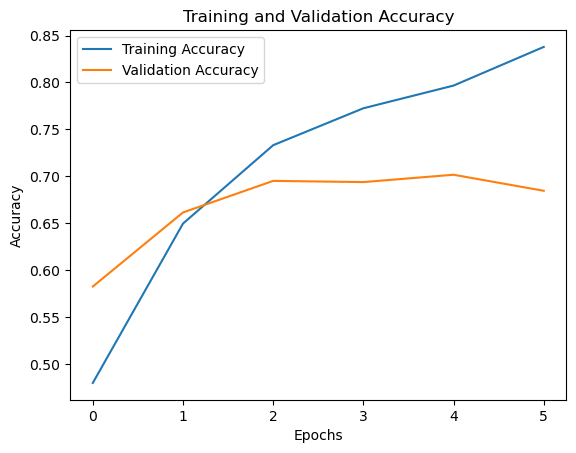

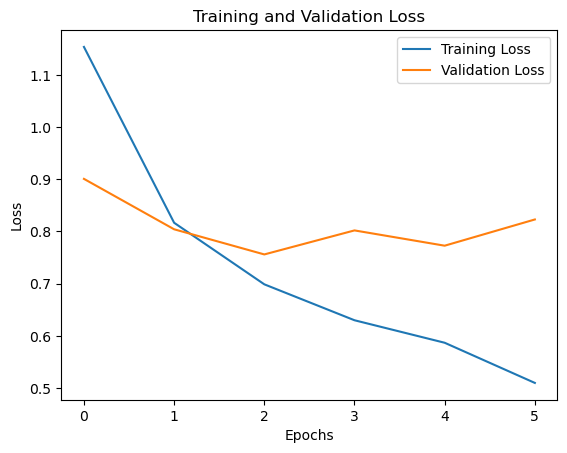

In [202]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy/loss
def plot_history(history):
    # Extract accuracy and loss values from the training history
    acc = history.history['accuracy']  # Training accuracy
    val_acc = history.history['val_accuracy']  # Validation accuracy
    loss = history.history['loss']  # Training loss
    val_loss = history.history['val_loss']  # Validation loss
    epochs = range(len(acc))  # Number of epochs

    # Plot training and validation accuracy
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to visualize accuracy and loss
plot_history(history)

# Making Predictions

In [204]:
# Predict sentiment on new data (X_test as example)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


In [205]:
# Show some predictions
for i in range(5):
    print(f"Text: {data['text'][i]}")
    print(f"True Sentiment: {y_test[i]}, Predicted Sentiment: {predicted_classes[i]}")
    print()

Text:  i`d have responded, if i were going
True Sentiment: 2, Predicted Sentiment: 1

Text:  sooo sad i will miss you here in san diego!!!
True Sentiment: 1, Predicted Sentiment: 1

Text: my boss is bullying me...
True Sentiment: 1, Predicted Sentiment: 1

Text:  what interview! leave me alone
True Sentiment: 0, Predicted Sentiment: 0

Text:  sons of ****, why couldn`t they put them on the releases we already bought
True Sentiment: 2, Predicted Sentiment: 2

